In [1]:
# Import the necessary libraries
import pandas as pd # Pandas for treatment of data


In [2]:
# Load data from experiment results file

pd.options.display.max_columns = None   # Shows all columns of DataFrame

df_PP = pd.read_csv('AlgorithmData_Test.csv', 
                            sep=',', 
                            header=0) # header=0 --> the header is in the first line (line[0])

df_PP.head(2) # Mostramos solo los 10 primeros partidos del DataFrame

,Algorithm,Map,start_x,start_y,goal_x,goal_y,x_coord,y_coord,Path_length,Iteration,Setup
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A_Star,P_empty,0.0,0.0,100.0,100.0,"[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...","[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...",141.421356,101.0,0.0


In [3]:
# Data clean and correction
# Drop all empty records. Empty lines that appears in the data generation
# Drop all registers with NaN values in the Algorithm field

df_PP = df_PP[df_PP['Algorithm'].notna()]
# Change data P1_B by P1B to have an homogenious pattern
df_PP.Map = df_PP.Map.replace({"P1_B": 'P1B'})

# Drop registers with values distinct from zero in start and goal fields
df_PP = df_PP.drop(df_PP[df_PP['start_x'] == 45 ].index) 
df_PP = df_PP.drop(df_PP[df_PP['start_y'] == 45 ].index) 
df_PP = df_PP.drop(df_PP[df_PP['goal_x'] == 45 ].index) 
df_PP = df_PP.drop(df_PP[df_PP['goal_y'] == 45 ].index)

# Drops the columns with zero or constant values

df_PP.drop(['start_x', 'start_y', 'goal_x', 'goal_y','x_coord', 'y_coord'], 1, inplace=True)
                                                                                
df_PP

,Algorithm,Map,Path_length,Iteration,Setup
1,A_Star,P_empty,141.421356,101.0,0.0
7,A_Star,P1,148.450794,2957.0,0.0
13,A_Star,P2,148.450794,2962.0,0.0
19,A_Star,P3,148.450794,3049.0,0.0
25,Bidirectional_A_Star,P_empty,141.421356,51.0,0.0
...,...,...,...,...,...
824,RRT_Star,C4A,233.402185,17652.0,1.0
826,RRT_Star,C4A,230.715812,15588.0,1.0
828,RRT_Star,C4A,222.226995,16165.0,1.0
830,RRT_Star,C4A,217.464591,20449.0,1.0


In [5]:
# For test propose only 
# list(df_PP.columns)   # See the fields as a list
# df_PP.info()   # shows information --> rows number, columns, data type, memory used
# df_PP.describe()   # Shows descriptive statistics from columns. Count elements, mean, std, min, 
# Q1, Q2, Q3, max

# Aggregation example
# df_PP.groupby(['Algorithm Type']).agg(['count'])

# df_PP.groupby(['Algorithm'])['Path_length'] \
        #    .agg(['count', 'sum', 'mean', 'median', 'max', 'min', 'std', 'var', 'first', 'last']) \
        #    .reset_index()

# Order according to algorithm criteria
# df_test.sort_values(by='Algorithm Type', ascending=True)

# df_PP.groupby(['Algorithm', 'Algorithm Type'])['Iteration'] \
#            .agg(['count', 'sum', 'mean', 'median', 'std']) \
#            .reset_index()


In [4]:
# Add new columns with information generated from existing data
# Create new column with conditionals
df_PP['Obstacle_type'] = df_PP['Map'].apply(lambda x: 'Concave' if x == 'C3' or x == 'C3A' or x == 'C3B'
                                                    or x == 'C4' or x == 'C4A' or x == 'C4B'
                                                    or x == 'C5' or x == 'C5A' or x == 'C5B'
                                                    else 'Convex')

df_PP['Algorithm_Type'] = df_PP['Algorithm'].apply(lambda x: 'Deterministic' if (x == 'A_Star' or 
                                                    x == 'Bidirectional_A_Star' or x == 'Bidirectional_BFS' 
                                                    or x == 'BFS' or x == 'DFS' or x == 'Dijkstra'
                                                    or x == 'D_Star' or x == 'Greedy_BFS' or 
                                                    x == 'Visibility_Road_Map') else 'Probabilistic')

# Agrego campo Q_obst (cantidad de cuadros -nodos- ocupados por los obstaculosen cada scenario)
df_PP['Q_obstacle'] = df_PP['Map'].apply(lambda x: 0 if x == 'P_empty' or x == 'P1A_empty' or x == 'P1B_empty' 
                                                    else (242/100 if x == 'P1' or x == 'P1A' or x == 'P1B'
                                                    or x == 'P2' or x == 'P2A' or x == 'P2B'
                                                    or x == 'P3' or x == 'P3A' or x == 'P3B' 
                                                    else (1692/100 if x == 'C1' or x == 'C1A' or x == 'C1B'
                                                    else (1342/100 if x == 'C2' or x == 'C2A' or x == 'C2B'
                                                    else (2952/100 if x == 'C3' or x == 'C3A' or x == 'C3B'
                                                    else 2431/100)))))

df_PP

,Algorithm,Map,Path_length,Iteration,Setup,Obstacle_type,Algorithm_Type,Q_obstacle
1,A_Star,P_empty,141.421356,101.0,0.0,Convex,Deterministic,0.00
7,A_Star,P1,148.450794,2957.0,0.0,Convex,Deterministic,2.42
13,A_Star,P2,148.450794,2962.0,0.0,Convex,Deterministic,2.42
19,A_Star,P3,148.450794,3049.0,0.0,Convex,Deterministic,2.42
25,Bidirectional_A_Star,P_empty,141.421356,51.0,0.0,Convex,Deterministic,0.00
...,...,...,...,...,...,...,...,...
824,RRT_Star,C4A,233.402185,17652.0,1.0,Concave,Probabilistic,24.31
826,RRT_Star,C4A,230.715812,15588.0,1.0,Concave,Probabilistic,24.31
828,RRT_Star,C4A,222.226995,16165.0,1.0,Concave,Probabilistic,24.31
830,RRT_Star,C4A,217.464591,20449.0,1.0,Concave,Probabilistic,24.31


In [5]:
# Split the Dataframe in two. The first one is for the Scenarios with Convex obstacles and the second one 
# with the Concave obstacles

groups = df_PP.groupby(df_PP.Obstacle_type)
groups2 = df_PP.groupby(df_PP.Setup)

df_setup_0 = groups2.get_group(0)
df_setup_not_0 = df_PP.drop(df_PP[df_PP['Setup'] == 0].index)

df_convex = groups.get_group('Convex')
df_convex = df_convex.drop_duplicates(['Setup', 'Algorithm', 'Map'], keep="last")
# df_convex
df_concave = groups.get_group('Concave')
df_concave = df_concave.drop_duplicates(['Setup', 'Algorithm', 'Map'], keep="last")

# df_concave

In [26]:
# from pandas_profiling import ProfileReport
# from scipy import stats as st

# # We create the profiling report
# profile = ProfileReport(df=df_concave, title='Profiling Report Felicidad', explorative=True)

# # Lo exportamos a HTML
# profile.to_file(".Reporte_PP_Concave.html")

# # Mostramos el reporte por pantalla
# profile

In [25]:
# from pandas_profiling import ProfileReport
# from scipy import stats as st

# # We create the profiling report
# profile = ProfileReport(df=df_convex, title='Profiling Report Felicidad', explorative=True)

# # Lo exportamos a HTML
# profile.to_file(".Reporte_PP_Convex.html")

# # Mostramos el reporte por pantalla
# profile


* PLOTS FOR DATA ANALYSIS
  

In [6]:
# Import needed libraries, to plot with seaborn 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

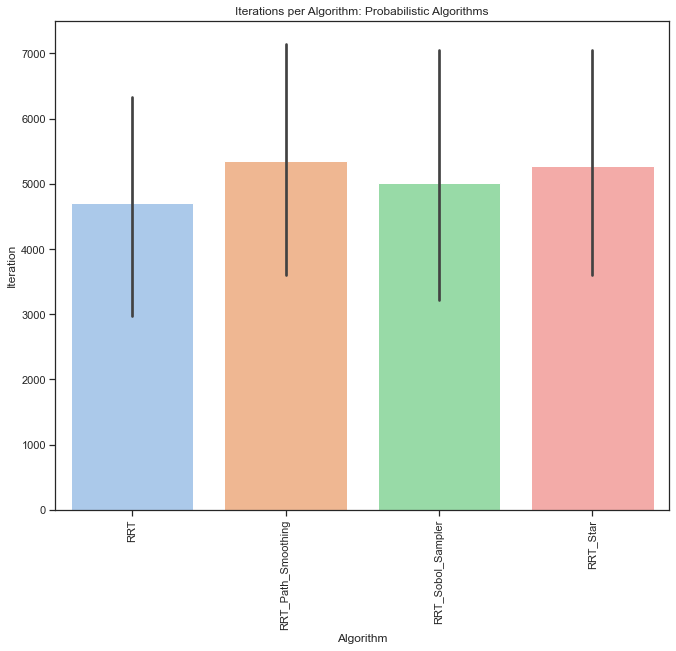

In [7]:
# Bar plot
sns.set_theme(style="ticks", palette="pastel")
fig = plt.figure(figsize = (11,9))
# plt.ion()  # Ponemos la sesión como interactiva si no está como tal
plt.axes()  
degrees = 90
plt.xticks(rotation=degrees)
plt.title('Iterations per Algorithm: Probabilistic Algorithms')
sns.barplot(x="Algorithm", y="Iteration", data=df_setup_not_0)
plt.show()

fig.tight_layout()
fig.savefig('BarPlot1.svg', bbox_inches='tight')



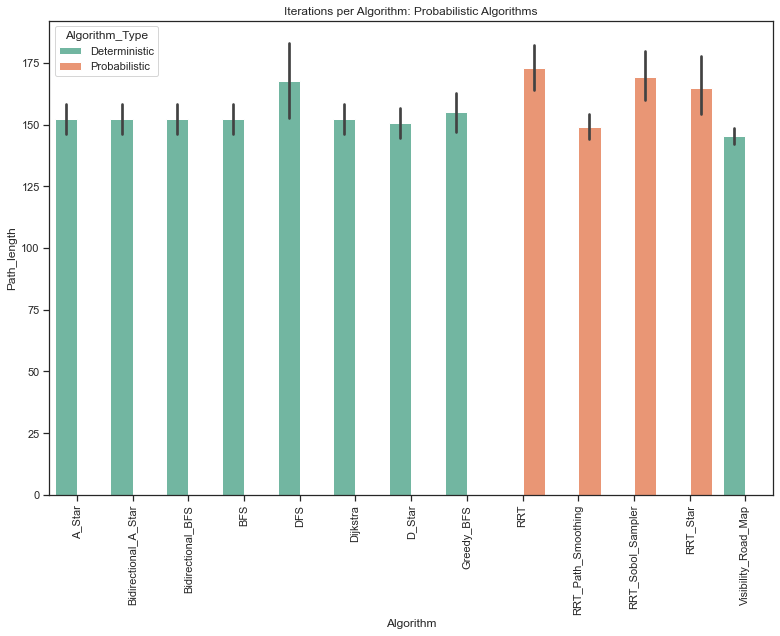

In [92]:
# It is possible to classify by groups
sns.set_theme(style="ticks", palette="pastel")
fig = plt.figure(figsize = (11,9))
degrees = 90
plt.xticks(rotation=degrees)
plt.title('Iterations per Algorithm: Probabilistic Algorithms')
sns.barplot(x="Algorithm", y="Path_length", hue="Algorithm_Type", data=df_convex, palette="Set2")

fig.tight_layout()
fig.savefig('BarPlot2.svg', bbox_inches='tight')


<AxesSubplot:title={'center':'Iterations per Algorithm: Probabilistic Algorithms'}, xlabel='Algorithm', ylabel='Iteration'>

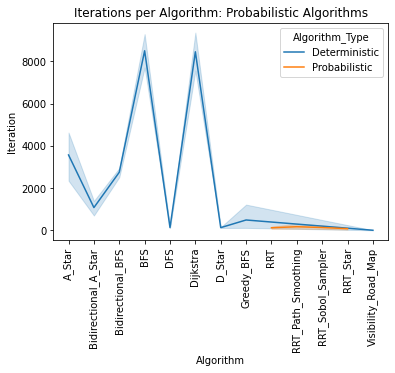

In [36]:
# Plot with several line plots
degrees = 90
plt.xticks(rotation=degrees)
plt.title('Iterations per Algorithm: Probabilistic Algorithms')

sns.lineplot(x="Algorithm", y="Iteration", hue="Algorithm_Type", data=df_setup_0)

<AxesSubplot:title={'center':'Iterations per Algorithm: Probabilistic Algorithms'}, xlabel='Path_length', ylabel='Iteration'>

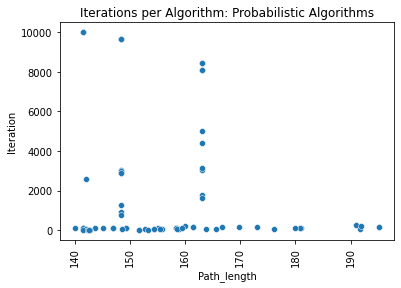

In [37]:
# Scatter shows the relation between two variables
degrees = 90
plt.xticks(rotation=degrees)
plt.title('Iterations per Algorithm: Probabilistic Algorithms')

sns.scatterplot(x="Path_length", y="Iteration", data=df_convex)


<AxesSubplot:title={'center':'Iterations per Algorithm: Probabilistic Algorithms'}, xlabel='Path_length', ylabel='Iteration'>

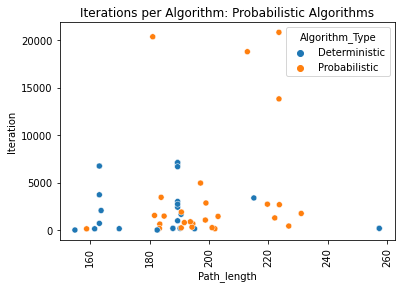

In [39]:
# It is possible plot by types
degrees = 90
plt.xticks(rotation=degrees)
plt.title('Iterations per Algorithm: Probabilistic Algorithms')

sns.scatterplot(x="Path_length", y="Iteration", hue="Algorithm_Type", data=df_concave)


Text(0, 0.5, '%')

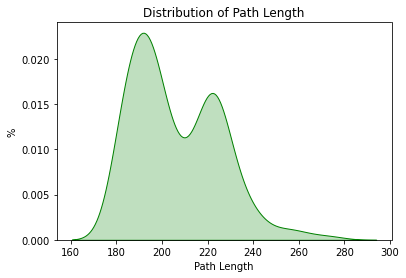

In [41]:
# Histograms

sns.kdeplot(df_setup_not_0['Path_length'], shade=True, color="g")
plt.title('Distribution of Path Length')
plt.xlabel('Path Length')
plt.ylabel('%')


<AxesSubplot:title={'center':'Iterations per Algorithm: Probabilistic Algorithms'}, xlabel='Algorithm_Type', ylabel='Iteration'>

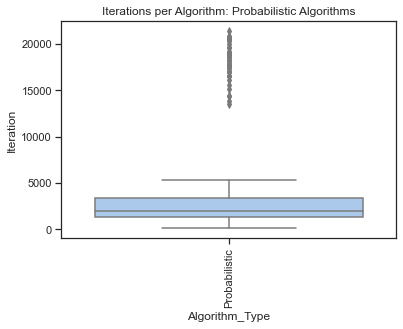

In [93]:
# Boxplots Analysis of dispersion
degrees = 90
plt.xticks(rotation=degrees)
plt.title('Iterations per Algorithm: Probabilistic Algorithms')

sns.boxplot(x="Algorithm_Type", y="Iteration", data=df_setup_not_0)


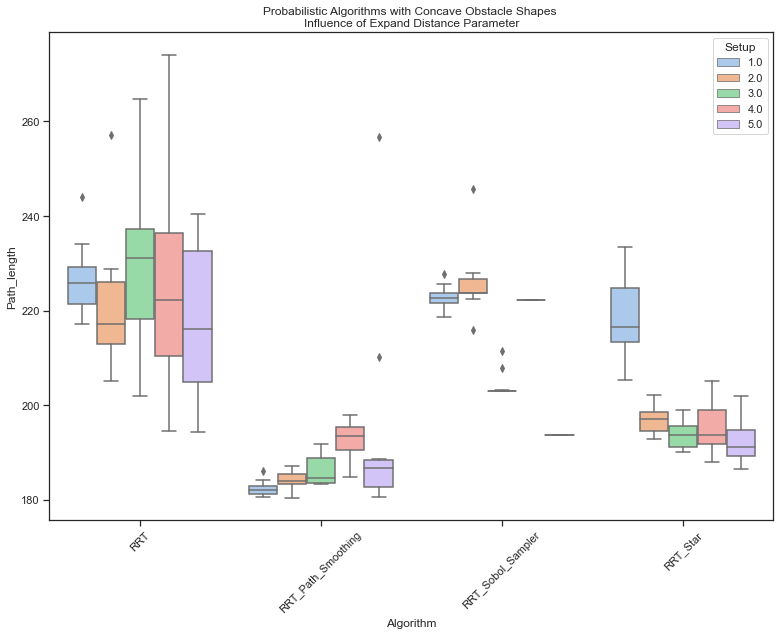

In [10]:
# It is possible to analyze by groups
sns.set_theme(style="ticks", palette="pastel")
fig = plt.figure(figsize = (11,9))
degrees = 45
plt.xticks(rotation=degrees)
plt.title('Probabilistic Algorithms with Concave Obstacle Shapes \nInfluence of Expand Distance Parameter')

sns.boxplot(x="Algorithm", y="Path_length", hue="Setup", data=df_setup_not_0)

fig.tight_layout()
# fig.savefig('BoxPlot_setup_not0_Iteration.svg', bbox_inches='tight')
fig.savefig('BoxPlot_setup_not0_PathLength.svg', bbox_inches='tight')



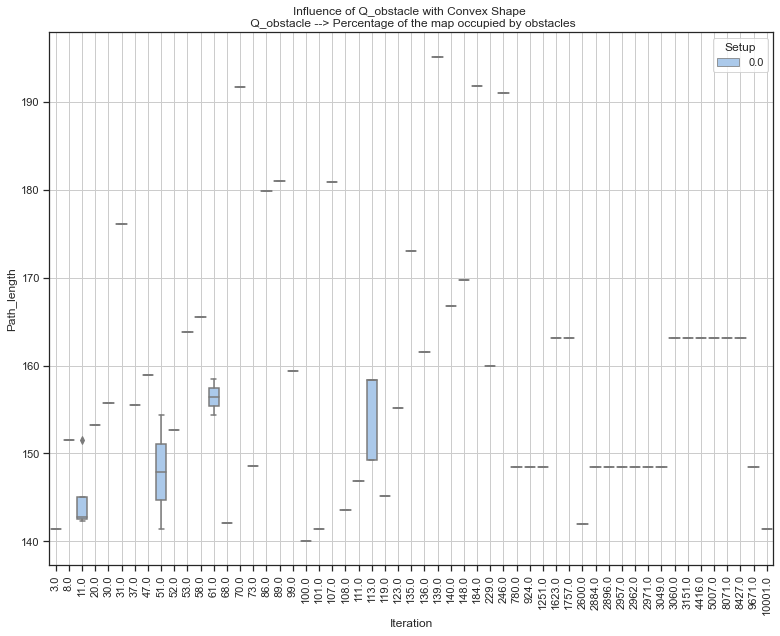

In [29]:
# It is possible to analyze by groups
sns.set_theme(style="ticks", palette="pastel")
fig = plt.figure(figsize = (11,9))
degrees = 90
plt.xticks(rotation=degrees)
plt.title('Influence of Q_obstacle with Convex Shape \n Q_obstacle --> Percentage of the map occupied by obstacles')

sns.boxplot(x="Iteration", y="Path_length", hue="Setup", data=df_convex)
plt.grid()

fig.tight_layout()
fig.savefig('BoxPlot_Q_Obst_Convex_PathLength.svg', bbox_inches='tight')
# fig.savefig('BoxPlot_Q_Obst_Convex_Iteration.svg', bbox_inches='tight')



<AxesSubplot:title={'center':'Iterations per Algorithm: Probabilistic Algorithms'}, xlabel='Path_length'>

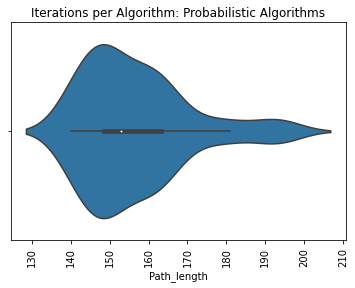

In [49]:
# Violin diagram, shows de distribution of data and its density of probability
degrees = 90
plt.xticks(rotation=degrees)
plt.title('Iterations per Algorithm: Probabilistic Algorithms')

sns.violinplot(x="Path_length", data=df_convex)


<AxesSubplot:title={'center':'Iterations per Algorithm: Probabilistic Algorithms'}, xlabel='Algorithm', ylabel='Iteration'>

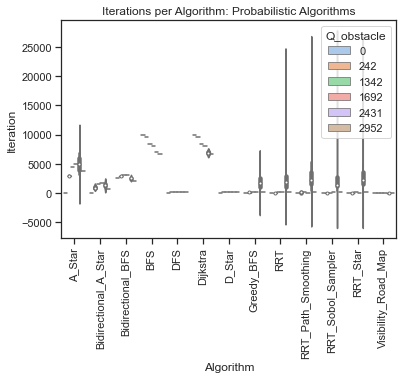

In [115]:
# It is possible to put more attributes
degrees = 90
plt.xticks(rotation=degrees)
plt.title('Iterations per Algorithm: Probabilistic Algorithms')

sns.violinplot(x="Algorithm", y="Iteration", hue="Q_obstacle", data=df_PP)


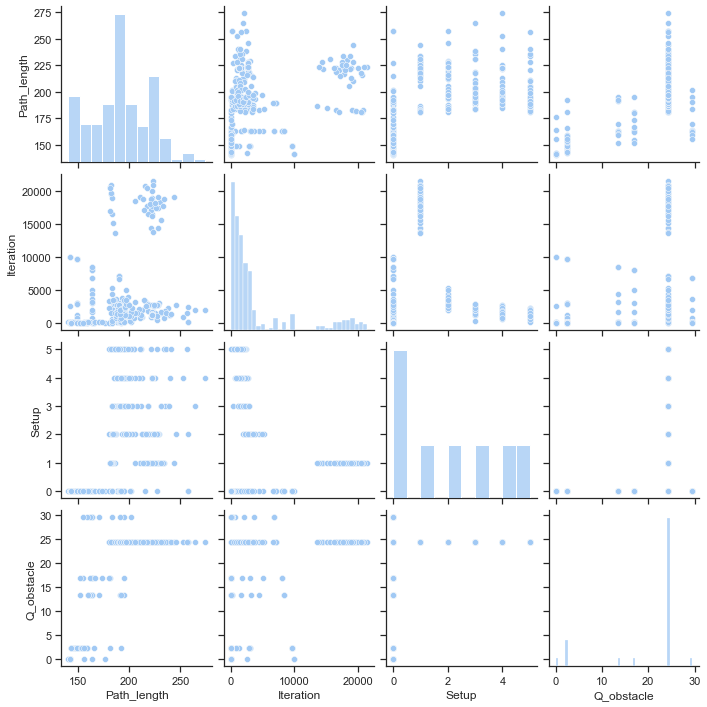

In [31]:
# This plot allow to see the relationship between each pairs of variables from Dataset
# First look all pairs to observe which have a significant relation
# degrees = 90
# plt.xticks(rotation=degrees)
# plt.title('Iterations per Algorithm: Probabilistic Algorithms')

sns.pairplot(df_PP)

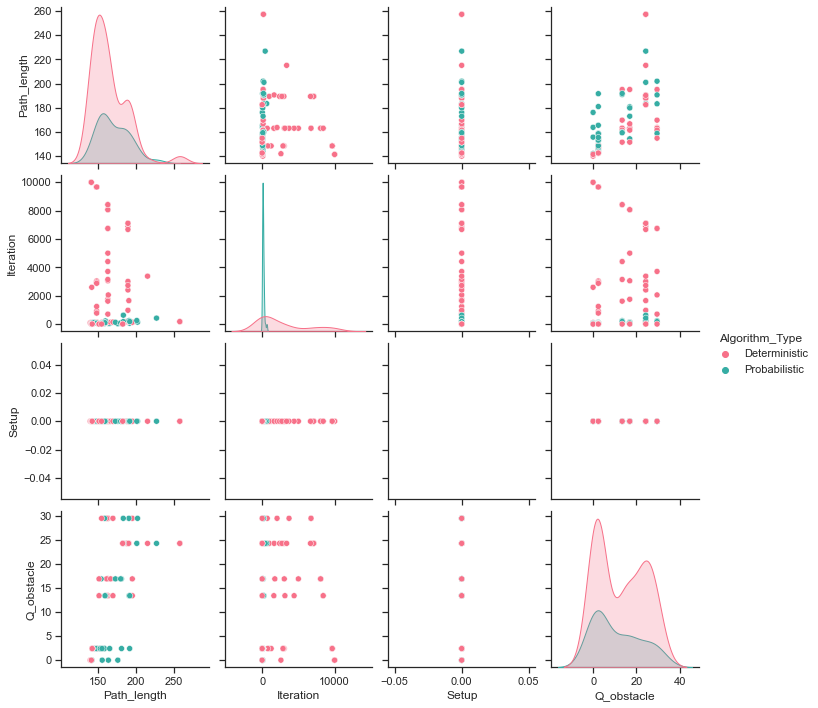

In [32]:
# After we can analyze the pairs better related
# degrees = 90
# plt.xticks(rotation=degrees)
# plt.title('Iterations per Algorithm: Probabilistic Algorithms')

sns.pairplot(df_setup_0, hue="Algorithm_Type", palette="husl")

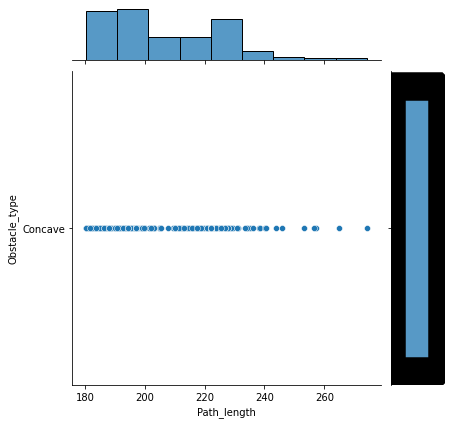

In [70]:
# Shows the relationship between a pair of variables and its distributions
# degrees = 90
# plt.xticks(rotation=degrees)
# plt.title('Iterations per Algorithm: Probabilistic Algorithms')

sns.jointplot(x="Path_length", y="Obstacle_type", data=df_setup_not_0)


Text(0.5, 1.0, 'Iterations per Algorithm: Probabilistic Algorithms')

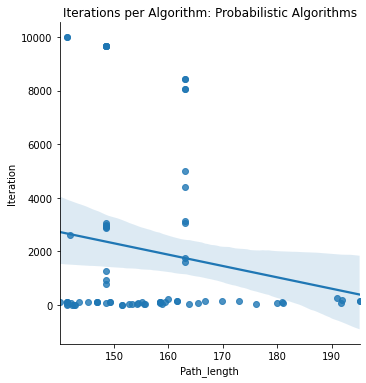

In [72]:
# Shows the reationship between a pair of variables and its regression line
# Muestra la relacion entre un par de variables y su recta de regresion
# degrees = 90
# plt.xticks(rotation=degrees)
# plt.title('Iterations per Algorithm: Probabilistic Algorithms')

sns.lmplot(x="Path_length", y="Iteration", data=df_convex)
plt.title('Iterations per Algorithm: Probabilistic Algorithms')


<Figure size 792x648 with 0 Axes>

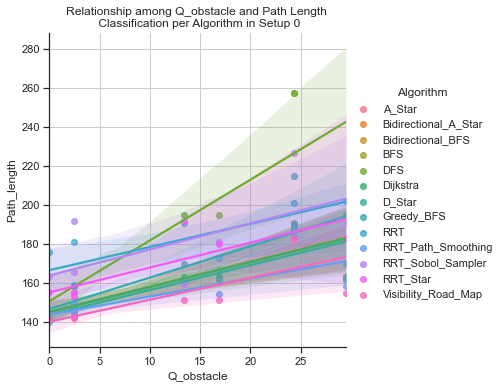

In [56]:
# It is possible comapre by some classes
sns.set_theme(style="ticks", palette="pastel")
fig = plt.figure(figsize = (11,9))
# degrees = 90
# plt.xticks(rotation=degrees)

sns.lmplot(x="Q_obstacle", y="Path_length", hue="Algorithm", data=df_setup_0)
plt.grid()
plt.title('Relationship among Q_obstacle and Path Length \n Classification per Algorithm in Setup 0')


fig.tight_layout()
fig.savefig('RegressionLine_Q_obst_PathLength.svg', bbox_inches='tight')



In [79]:
from pandas_profiling import ProfileReport
from scipy import stats as st

# We create the profiling report
profile = ProfileReport(df=df_setup_0, title='Profiling Report Original Setup', explorative=True)

# Lo exportamos a HTML
profile.to_file(".Reporte_PP_Setup_0.html")

# Mostramos el reporte por pantalla
profile

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 200.96it/s]
